 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Set the file path for whale_returns.csv
whale_path = Path("./Resources/whale_returns.csv")

# Reading whale returns
whales_df = pd.read_csv(whale_path, index_col ='Date', parse_dates=True, infer_datetime_format=True)
whales_df = whales_df.sort_index(ascending=True)
whales_df.describe()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
count,1059.000000,1059.000000,1059.000000,1059.000000
mean,0.000179,-0.000203,-0.000081,0.000501
std,0.007842,0.006977,0.010824,0.012831
min,-0.032711,-0.032099,-0.139820,-0.066505
25%,-0.003594,-0.003961,-0.004746,-0.005515
50%,0.000467,0.000000,0.000232,0.000617
75%,0.004292,0.003567,0.005176,0.007516
max,0.042977,0.029338,0.080705,0.061341


In [3]:
# Count nulls
whales_df.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whales_df = whales_df.dropna()
whales_df.isnull().sum()
#QUESTION: COUNT() NOT RETURNING COUNT OF NULLS

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [5]:
# Preview data in whales_df
whales_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Set the file path for algo_returns.csv
algo_path = Path("./Resources/algo_returns.csv")

# Reading whale returns
algo_df = pd.read_csv(algo_path, index_col ='Date', parse_dates=True, infer_datetime_format=True)
algo_df = algo_df.sort_index(ascending=True)
algo_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1241 entries, 2014-05-28 to 2019-05-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Algo 1  1241 non-null   float64
 1   Algo 2  1235 non-null   float64
dtypes: float64(2)
memory usage: 29.1 KB


In [7]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_df = algo_df.dropna()
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [9]:
# Preview data in algo_df
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Set the file path for sp500_history.csv
sp500_path = Path("./Resources/sp500_history.csv")

# Reading sp500 returns
sp500_df = pd.read_csv(sp500_path, index_col ='Date', parse_dates=True, infer_datetime_format=True)
sp500_df = sp500_df.sort_index(ascending=True)
sp500_df.describe()


,Close
count,1649
unique,1639
top,$2066.66
freq,2


In [11]:
# Check Data Types
sp500_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2012-10-01 to 2019-04-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1649 non-null   object
dtypes: object(1)
memory usage: 25.8+ KB


In [12]:
# Fix Data Types; convert object to float

# The code below is derived from the notes presented here (https://pbpython.com/currency-cleanup.html), regarding currency cleanup leveraging regular expressions. 
sp500_df['Close'] = sp500_df['Close'].replace({'\$': '', ',': ''}, regex=True).astype(float)
sp500_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [13]:
# Calculate Daily Returns and drop nulls
sp500_df['SP500_Returns'] = sp500_df.pct_change().dropna()
sp500_df.head()


,Close,SP500_Returns
Date,,
2012-10-01,1444.49,NaN
2012-10-02,1445.75,0.000872
2012-10-03,1450.99,0.003624
2012-10-04,1461.40,0.007174
2012-10-05,1460.93,-0.000322


In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df = sp500_df.rename({'Close':'SP500'}, axis=1)
sp500_df.head()

,SP500,SP500_Returns
Date,,
2012-10-01,1444.49,NaN
2012-10-02,1445.75,0.000872
2012-10-03,1450.99,0.003624
2012-10-04,1461.40,0.007174
2012-10-05,1460.93,-0.000322


In [33]:
# Create new dataframe holding SP500 returns only
sp500_returns_df = sp500_df.drop('SP500', axis=1).dropna()
sp500_returns_df.head()

,SP500_Returns
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [34]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_returns_df = pd.concat([whales_df, algo_df, sp500_returns_df], axis="columns", join="inner")

# Clean up column names
all_returns_df.columns = ['SOROS', 'PAULSON', 'TIGER_GLOBAL', 'BERKSHIRE_HATHAWAY', 'ALGO1', 'ALGO2', 'SP500']
all_returns_df.head()

,SOROS,PAULSON,TIGER_GLOBAL,BERKSHIRE_HATHAWAY,ALGO1,ALGO2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

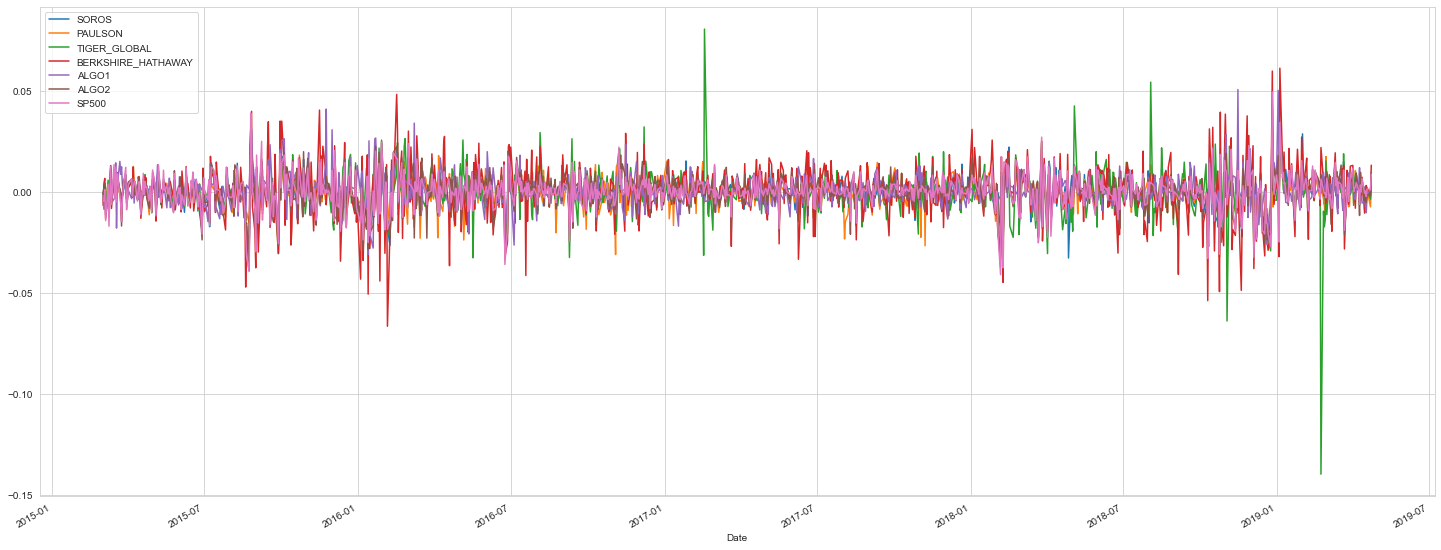

In [35]:
# Plot daily returns of all portfolios
all_returns_df.plot(figsize = (25,10))

#### Calculate and Plot cumulative returns.

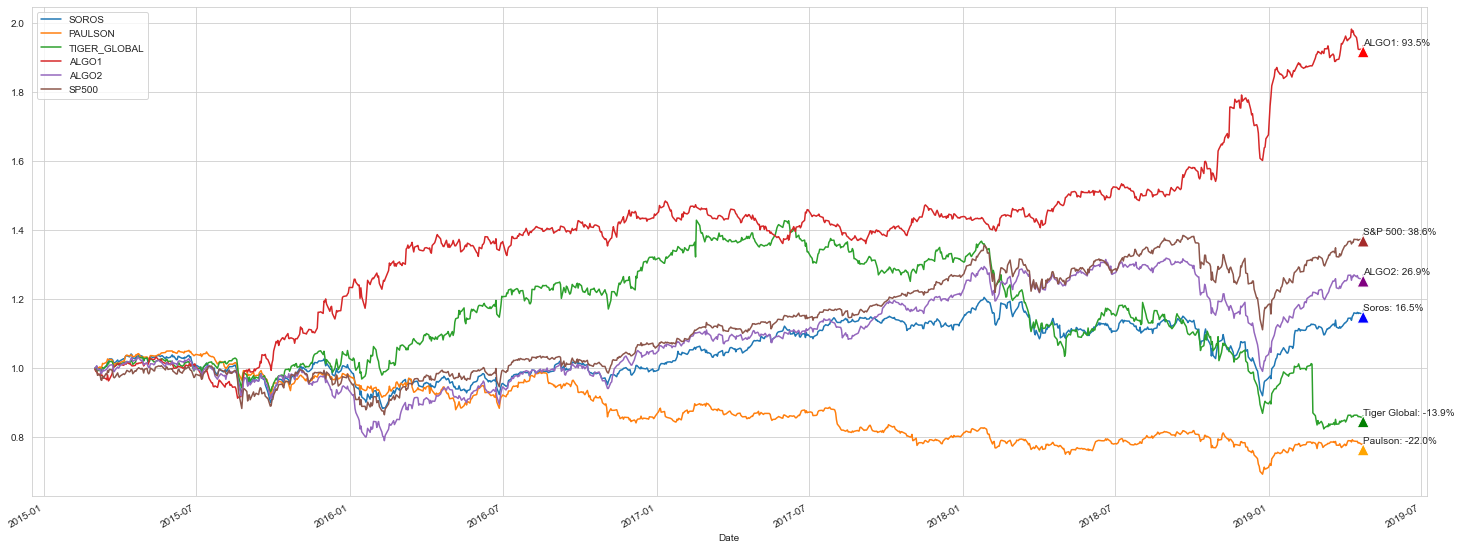

In [36]:
# Calculate cumulative returns of all portfolios
soros_cumulative_return =  (1 + all_returns_df['SOROS']).cumprod()
paulson_cumulative_return = (1 + all_returns_df['PAULSON']).cumprod()
tiger_cumulative_return = (1 + all_returns_df['TIGER_GLOBAL']).cumprod()
algo1_cumulative_return = (1 + all_returns_df['ALGO1']).cumprod()
algo2_cumulative_return = (1 + all_returns_df['ALGO2']).cumprod()
sp500_cumulative_return = (1 + all_returns_df['SP500']).cumprod()

# Store end point of cumulative return series; will use end point to annotate graph
soros_return = ("Soros: "+"{:.1f}".format((soros_cumulative_return[-1]-1)*100)+"%")
paulson_return = ("Paulson: "+"{:.1f}".format((paulson_cumulative_return[-1]-1)*100)+"%")
tiger_return = ("Tiger Global: "+"{:.1f}".format((tiger_cumulative_return[-1]-1)*100)+"%")
algo1_return = ("ALGO1: "+"{:.1f}".format((algo1_cumulative_return[-1]-1)*100)+"%")
algo2_return = ("ALGO2: "+"{:.1f}".format((algo2_cumulative_return[-1]-1)*100)+"%")
sp500_return = ("S&P 500: "+"{:.1f}".format((sp500_cumulative_return[-1]-1)*100)+"%")

# Set up plot
plt.figure(figsize=(25, 10))


# Plot cumulative returns; annotate end point with cummulative return
soros_cumulative_return.plot().annotate(soros_return,xy=(all_returns_df.index[-1], soros_cumulative_return.tail(1)), arrowprops = dict(facecolor ='blue', shrink = 0.7),)
paulson_cumulative_return.plot().annotate(paulson_return,xy=(all_returns_df.index[-1], paulson_cumulative_return.tail(1)), arrowprops = dict(facecolor ='orange', shrink = 0.7),)
tiger_cumulative_return.plot().annotate(tiger_return,xy=(all_returns_df.index[-1], tiger_cumulative_return.tail(1)), arrowprops = dict(facecolor ='green', shrink = 0.7),)
algo1_cumulative_return.plot().annotate(algo1_return,xy=(all_returns_df.index[-1], algo1_cumulative_return.tail(1)), arrowprops = dict(facecolor ='red', shrink = 0.7),)
algo2_cumulative_return.plot().annotate(algo2_return,xy=(all_returns_df.index[-1], algo2_cumulative_return.tail(1)), arrowprops = dict(facecolor ='purple', shrink = 0.7),)
sp500_cumulative_return.plot().annotate(sp500_return,xy=(all_returns_df.index[-1], sp500_cumulative_return.tail(1)), arrowprops = dict(facecolor ='brown', shrink = 0.7),)

plt.legend()


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

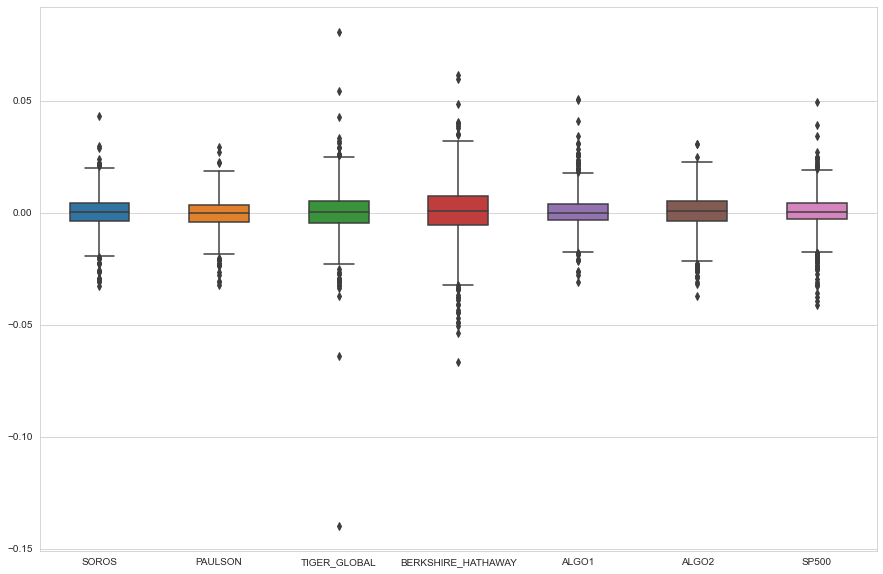

In [37]:
# Box plot to visually show risk
plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")
  
sns.boxplot(data = all_returns_df, width=0.5, fliersize=5, whis=2) 


### Calculate Standard Deviations

In [38]:
# Calculate the daily standard deviations of all portfolios
soros_stdev =  all_returns_df['SOROS'].std()
paulson_stdev = all_returns_df['PAULSON'].std()
tiger_stdev = all_returns_df['TIGER_GLOBAL'].std()
algo1_stdev = all_returns_df['ALGO1'].std()
algo2_stdev = all_returns_df['ALGO2'].std()


# Create dictionary of portfolios standard deviations
all_portfolio_stdev = {'SOROS' : soros_stdev, 
                       'PAULSON' : paulson_stdev, 
                       'TIGER': tiger_stdev, 
                       'ALGO1': algo1_stdev, 
                       'ALGO2': algo2_stdev}

all_portfolio_stdev


{'SOROS': 0.00789537186156226,
 'PAULSON': 0.007023079026076193,
 'TIGER': 0.010893969618743032,
 'ALGO1': 0.007620201966458274,
 'ALGO2': 0.008342274600964455}

### Determine which portfolios are riskier than the S&P 500

In [39]:
# Calculate  the daily standard deviation of S&P 500
sp500_stdev = all_returns_df['SP500'].std()
print(f'The standard deviation of the S&P 500 is: {sp500_stdev:.4}')

The standard deviation of the S&P 500 is: 0.008554


In [40]:
# Determine which portfolios are riskier than the S&P 500

# Compare standard deviation of each portfolio to standard deviation of SP500 by iterating through all_portfolio_stdev dictionary created above
for key, stdev in all_portfolio_stdev.items():
    if stdev > sp500_stdev:
        print(f'The {key} portfolio is riskier than the S&P 500.')
        print(f'The {key} portfolio has a standard deviation of {stdev: .4}, which is {stdev - sp500_stdev: .4} higher than the S&P 500 standard deviation of {sp500_stdev:.4}.')

The TIGER portfolio is riskier than the S&P 500.
The TIGER portfolio has a standard deviation of  0.01089, which is  0.00234 higher than the S&P 500 standard deviation of 0.008554.


### Calculate the Annualized Standard Deviation

In [41]:
# Calculate the annualized standard deviation (252 trading days)
for key, stdev in all_portfolio_stdev.items():
    annual_stdev =  stdev * np.sqrt(252)
    print(f'The annualized standard deviation for the {key} portfolio is {annual_stdev: .4}.\n')
    
print(f'The annualized standard deviation for the S&P500 portfolio is {sp500_stdev * np.sqrt(252): .4}.')  

The annualized standard deviation for the SOROS portfolio is  0.1253.

The annualized standard deviation for the PAULSON portfolio is  0.1115.

The annualized standard deviation for the TIGER portfolio is  0.1729.

The annualized standard deviation for the ALGO1 portfolio is  0.121.

The annualized standard deviation for the ALGO2 portfolio is  0.1324.

The annualized standard deviation for the S&P500 portfolio is  0.1358.


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

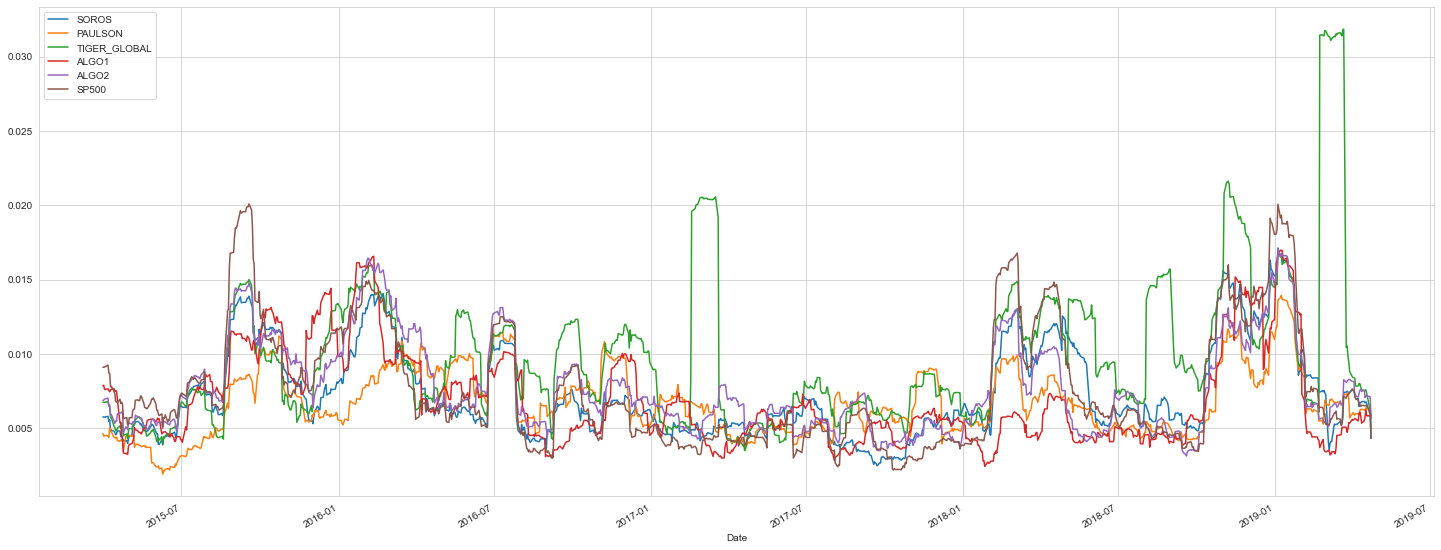

In [42]:
# Set up plot
plt.figure(figsize=(25, 10))

# Calculate the rolling standard deviation for all portfolios using a 21-day window
soros = all_returns_df['SOROS'].rolling(window=21).std()
paulson = all_returns_df['PAULSON'].rolling(window=21).std()
tiger = all_returns_df['TIGER_GLOBAL'].rolling(window=21).std()
algo1 = all_returns_df['ALGO1'].rolling(window=21).std()
algo2 = all_returns_df['ALGO2'].rolling(window=21).std()
sp500 = all_returns_df['SP500'].rolling(window=21).std()


# Plot the rolling standard deviation
soros.plot()
paulson.plot()
tiger.plot()
algo1.plot()
algo2.plot()
sp500.plot()

# Add legend to plot
plt.legend()

### Calculate and plot the correlation

<AxesSubplot:>

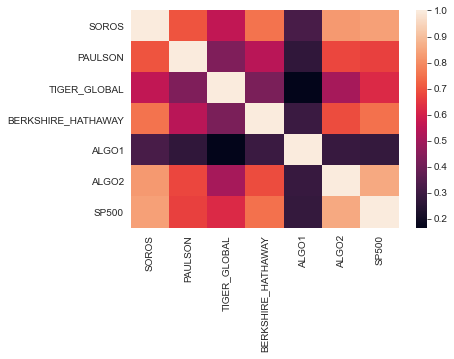

In [43]:
# Calculate the correlation
correlation = all_returns_df.corr()

# Display de correlation matrix
sns.heatmap(correlation)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

Soros covariance with S&P 500: 5.659e-05
S&P 500 variance: 7.317e-05
SOROS Beta: 0.7734 (5.659e-05 / 7.317e-05)



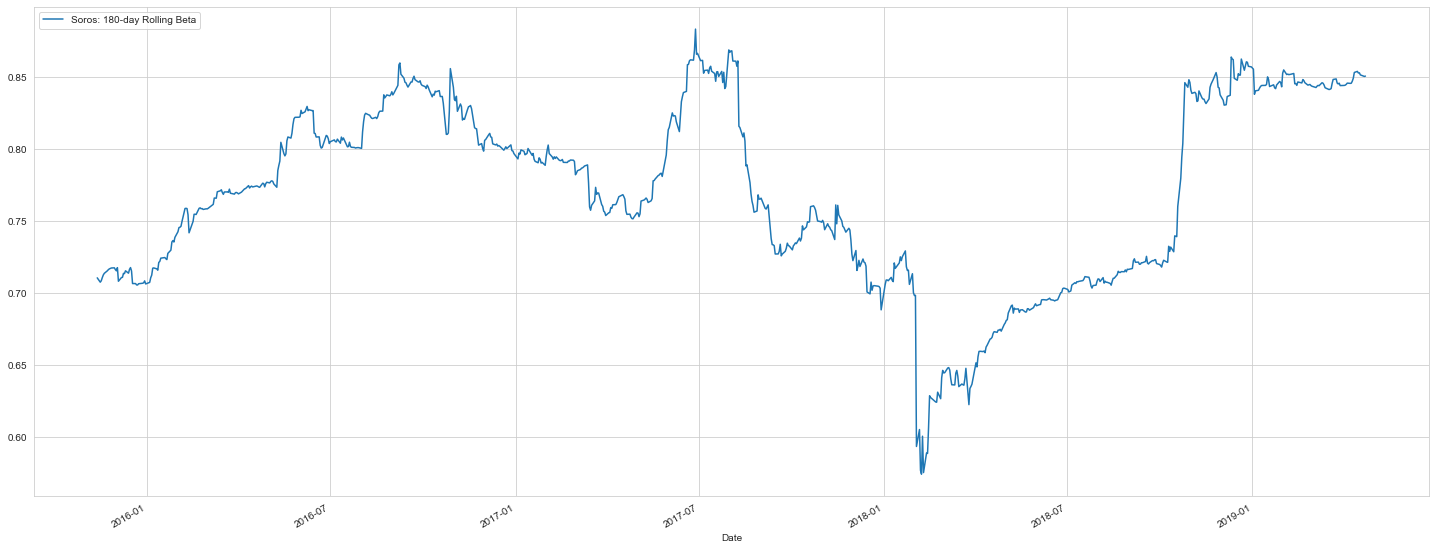

In [45]:
# Calculate covariance of a single portfolio
soros_covariance = all_returns_df['SOROS'].cov(all_returns_df['SP500'])
print(f"Soros covariance with S&P 500: {soros_covariance:.4}")

# Calculate variance of S&P 500
sp500_variance = all_returns_df['SP500'].var()
print(f"S&P 500 variance: {sp500_variance:.4}")

# Computing beta
soros_beta = soros_covariance / sp500_variance
print(f"SOROS Beta: {soros_beta:.4} ({soros_covariance:.4} / {sp500_variance:.4})\n")

# Plot beta trend
# Setup: Initialize days over which to calculate rolling day averaege. 
days_rolling = 180

# Step 1: Calculate rolling covariance of the SOROS portfolio vs. S&P 500 
rolling_soros_covariance = all_returns_df['SOROS'].rolling(window=days_rolling).cov(all_returns_df['SP500'])

# Step 2: Calculate rolling variance of S&P 500
rolling_sp500_variance = all_returns_df['SP500'].rolling(window=days_rolling).var()

# Step 3: Calculate rolling beta of the SOROS portfolio 
rolling_soros_beta = rolling_soros_covariance / rolling_sp500_variance

# Step 4: Plot rolling beta of Soros portfolio
plt.figure(figsize=(25, 10))
rolling_soros_beta.plot()

# Step 5: Add legend to plot
plt.legend(['Soros: 180-day Rolling Beta'], loc=2, fontsize='medium')



## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

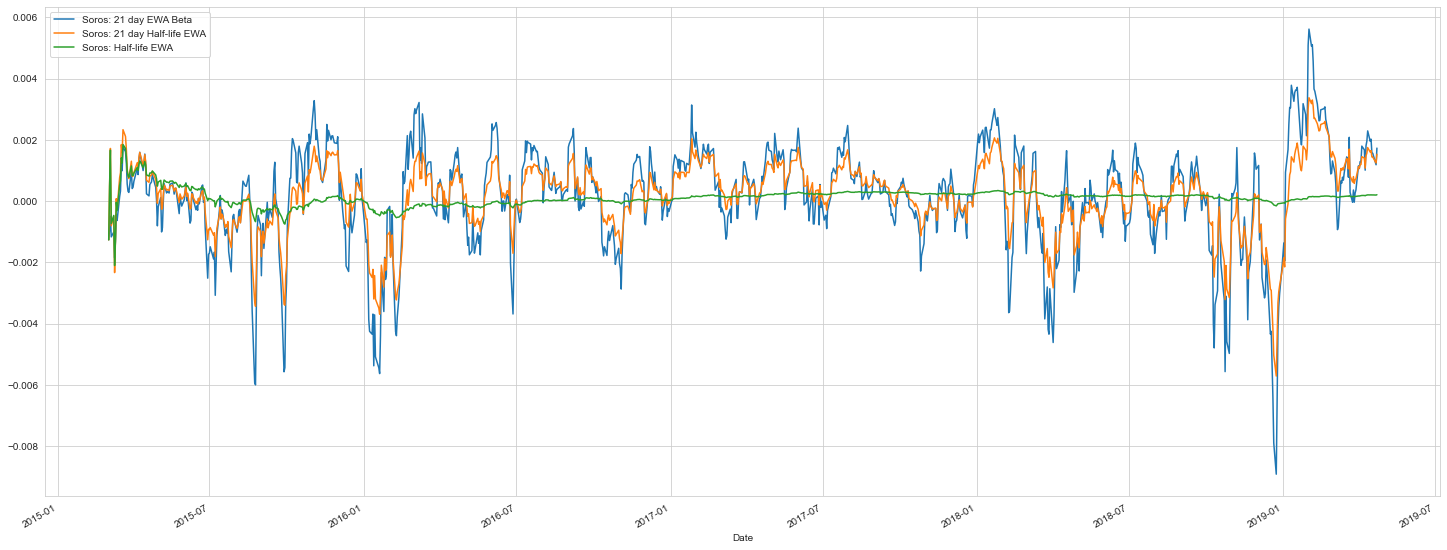

In [46]:
# Use `ewm` to calculate the rolling window 

# SOROS 21-day exponentially weighted average 
SOROS_21ewm = all_returns_df['SOROS'].ewm(span=21,adjust=False).mean()


# Code from pandas API: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ewm.html
times = all_returns_df.index
times = pd.DatetimeIndex(times)

SOROS_21day_halflife_ewm = all_returns_df['SOROS'].ewm(halflife='21 day', times=pd.DatetimeIndex(times)).mean()


# SOROS half-life exponentially weighted average over entire dataset
length = len(all_returns_df)
string_halflife = str(length)+ ' day'

SOROS_halflife_ewm = all_returns_df['SOROS'].ewm(halflife=string_halflife, times=pd.DatetimeIndex(times)).mean()



# Plot 21-day exponentially weighted average and half-life exponentially weighted average
plt.figure(figsize=(25, 10))
SOROS_21ewm.plot()
SOROS_21day_halflife_ewm.plot()
SOROS_halflife_ewm.plot()

# Add legend to plot
plt.legend(['Soros: 21 day EWA Beta','Soros: 21 day Half-life EWA','Soros: Half-life EWA'], loc=2, fontsize='medium')

#HELP: Do not understand parameteres for ewm with halflife
#HELP: Need to fix legend

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [48]:
# Annualized Sharpe Ratios
sharpe_ratios = (all_returns_df.mean() * 252) / (all_returns_df.std() * np.sqrt(252))
sharpe_ratios


SOROS                 0.356417
PAULSON              -0.483570
TIGER_GLOBAL         -0.121060
BERKSHIRE_HATHAWAY    0.621810
ALGO1                 1.378648
ALGO2                 0.501364
SP500                 0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

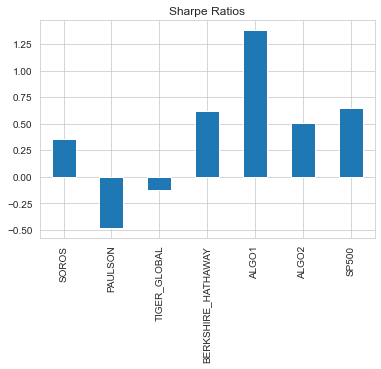

In [49]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

In [50]:
print(f"Based on the sharpe ratios calculated using the data sets provided and consolidated in all_returns_df, the portfolio ")
print(f"with the best risk/reward is ALGO1. ALGO1 is also the only acceptable risk/reward portfolio as its sharpe ratio is greater than one (1.38) indicating")
print(f"the portfolio's returns are greater than the its volitility. The S&P 500 has a slightly better risk/reward ratio (0.64) than Berkshire Hathaway (0.62).")
print(f"ALGO 2 is the next least worst portfolio with a sharpe ratio of 0.50. Paulson and Tiger Global have negative sharpe ratios indicating their performace is below the assumed risk-free of zero. ")


Based on the sharpe ratios calculated using the data sets provided and consolidated in all_returns_df, the portfolio 
with the best risk/reward is ALGO1. ALGO1 is also the only acceptable risk/reward portfolio as its sharpe ratio is greater than one (1.38) indicating
the portfolio's returns are greater than the its volitility. The S&P 500 has a slightly better risk/reward ratio (0.64) than Berkshire Hathaway (0.62).
ALGO 2 is the next least worst portfolio with a sharpe ratio of 0.50. Paulson and Tiger Global have negative sharpe ratios indicating their performace is below the assumed risk-free of zero. 


# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [51]:
# Reading historical price data from Google stock

# Set the file path for goog_historical.csv
goog_path = Path("./Resources/goog_historical.csv")

# Reading google price data
goog_df = pd.read_csv(goog_path, index_col ='Trade DATE', parse_dates=True, infer_datetime_format=True)
goog_df = goog_df.sort_index(ascending=True)
goog_df = goog_df.rename({'NOCP':'GOOG'}, axis=1)
goog_df = goog_df.drop('Symbol', axis=1)
goog_df.head()


,GOOG
Trade DATE,
2018-05-11,1098.26
2018-05-14,1100.20
2018-05-15,1079.23
2018-05-16,1081.77
2018-05-17,1078.59


In [52]:
# Reading price data from Apple stock

# Set the file path for appl_historical.csv
aapl_path = Path("./Resources/aapl_historical.csv")

# Reading google price data
aapl_df = pd.read_csv(aapl_path, index_col ='Trade DATE', parse_dates=True, infer_datetime_format=True)
aapl_df = aapl_df.sort_index(ascending=True)
aapl_df = aapl_df.rename({'NOCP':'AAPL'}, axis=1)
aapl_df = aapl_df.drop('Symbol', axis=1)
aapl_df.head()

,AAPL
Trade DATE,
2018-05-11,188.59
2018-05-14,188.15
2018-05-15,186.44
2018-05-16,188.18
2018-05-17,186.99


In [53]:
# Reading price data from Costco stock

# Set the file path for cost_historical.csv
cost_path = Path("./Resources/cost_historical.csv")

# Reading google price data
cost_df = pd.read_csv(cost_path, index_col ='Trade DATE', parse_dates=True, infer_datetime_format=True)
cost_df = cost_df.sort_index(ascending=True)
cost_df = cost_df.rename({'NOCP':'COST'}, axis=1)
cost_df = cost_df.drop('Symbol', axis=1)
cost_df.head()

,COST
Trade DATE,
2018-05-11,195.76
2018-05-14,195.88
2018-05-15,195.48
2018-05-16,198.71
2018-05-17,199.60


In [55]:
# Combine all stocks in a single DataFrame
stock_prices_df = pd.concat([goog_df, aapl_df, cost_df], axis="columns", join="inner")
stock_prices_df.isnull().sum()

GOOG    0
AAPL    0
COST    0
dtype: int64

In [56]:
stock_prices_df.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [36]:
# Reset Date index

# See above.



In [37]:
# Reorganize portfolio data by having a column per symbol

# See above. 


In [57]:
# Calculate daily returns and drop NAs
stock_returns_df = stock_prices_df.pct_change().dropna() 

# Display sample data
stock_returns_df.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

Trade DATE
2019-05-03    1.161489
2019-05-06    1.156196
2019-05-07    1.134462
2019-05-08    1.133841
2019-05-09    1.131855
dtype: float64


Text(2019-05-09 00:00:00, 11318.54951751101, 'Inception to date: +$1,318.55')

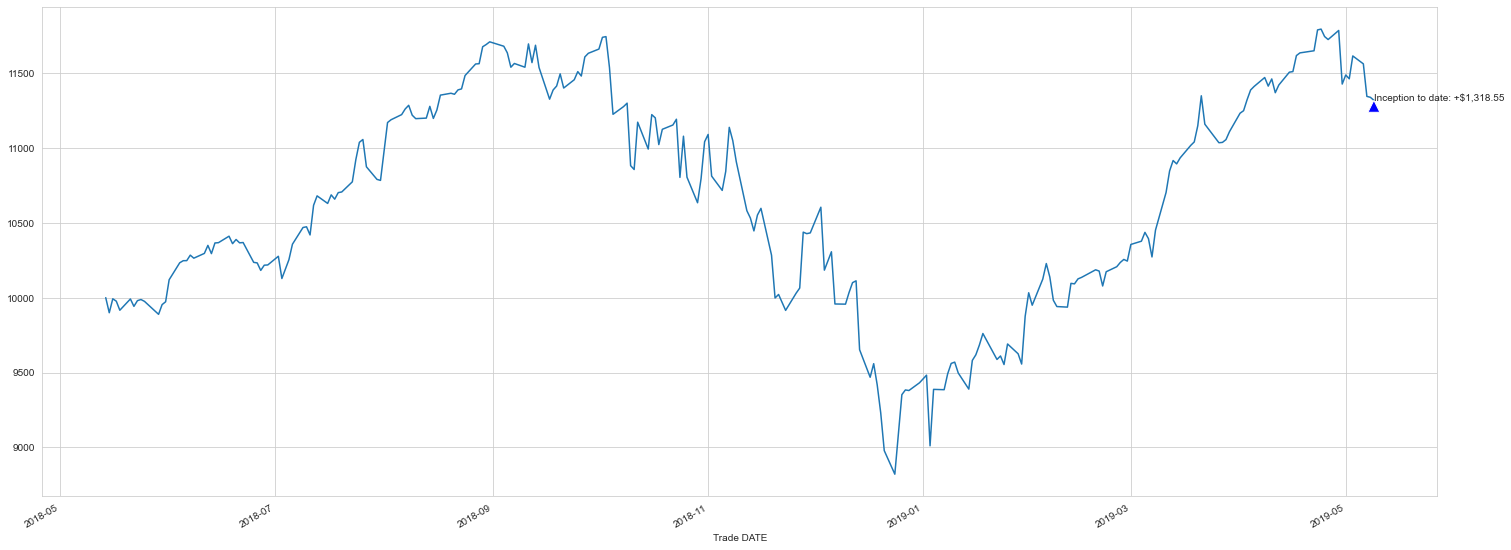

In [58]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
unoptimized_portfolio_df = stock_returns_df.dot(weights)
unoptimized_portfolio_returns = (1 + unoptimized_portfolio_df).cumprod()

# Display sample data
print(unoptimized_portfolio_returns.tail())

# Set Portfolio Weights, Calculate Daily and Cumulative Portfolio Returns, and
initial_investment = 10000
unoptimized_portfolio_profits = (initial_investment * unoptimized_portfolio_returns)

unopt_inception_to_date = ("Inception to date: +${:,.2f}".format(unoptimized_portfolio_profits[-1]-initial_investment))

#  Plot $10,000 Investment Over Time for Optimized Portfolio
plt.figure(figsize=(25, 10))
unoptimized_portfolio_profits.plot().annotate(unopt_inception_to_date,xy=(unoptimized_portfolio_returns.index[-1], unoptimized_portfolio_profits[-1]), arrowprops = dict(facecolor ='blue', shrink = 1),)


In [59]:
# Monte Carlo simulation to identify "optimized" portfolio weights -- "optimized" defined as highest Sharpe ratio.
# Not using Pandas Monte Carlo; Building from first principals (numpy & arrays) to get weighting of each stock in optimal portfolio
# Code block learned from Sigma Coding (https://www.youtube.com/channel/UCBsTB02yO0QGwtlfiv5m25Q/about)

# Set number of simulations
no_of_runs = 1000
no_of_stocks = 3

# Initialize portfolio weights to zero
all_weights = np.zeros((no_of_runs, no_of_stocks))

# Initialize arrays to hold results of simulation
return_array = np.zeros(no_of_runs)
vol_array = np.zeros(no_of_runs)
sharpe_array = np.zeros(no_of_runs)

# Calculate log returns of each stock (logs are better matched to a time dimension, i.e. returns overtime)
log_return = np.log(1 + stock_returns_df)

# Simulation
for x in range(no_of_runs):
    
    # Step 1: Calculate weights
    weights = np.array(np.random.random(no_of_stocks))
    weights = weights / np.sum(weights)
    
    # Step 2: Add weights to weights array
    all_weights[x,:] = weights
    
    # Step 3: Calculate expected returns
    return_array[x] = np.sum((log_return.mean()*weights)*252)
    
    # Step 4: Calculate volitility and add to vol_array
    vol_array[x] = np.sqrt(np.dot(weights.T, np.dot(log_return.cov()*252, weights)))
    
    # Step 5: Calculate Sharpe ratio
    sharpe_array[x] = return_array[x]/vol_array[x]
    
# Combine all arrays into master array
simulation_data =[return_array, vol_array, sharpe_array, all_weights]

# Create dataframe from master array
simulation_df = pd.DataFrame(data=simulation_data).T

# Name simulsimulation_df columns
simulation_df.columns = ['Returns', 'Volitility', 'Sharpe Ratio', 'Portfolio Weights']

# Ensure sure data types are floats (no accidental strings) 
simulation_df = simulation_df.infer_objects()

simulation_df.tail()

,Returns,Volitility,Sharpe Ratio,Portfolio Weights
995,0.080526,0.236063,0.341120,"[0.44476875574527036, 0.4286386843663039, 0.12..."
996,0.070998,0.241906,0.293493,"[0.5701215012375433, 0.35922373592954465, 0.07..."
997,0.080096,0.233597,0.342879,"[0.5389057319301154, 0.33385046541807467, 0.12..."
998,0.109819,0.210694,0.521226,"[0.4444356141297206, 0.2431675156409605, 0.312..."
999,0.060411,0.256074,0.235910,"[0.4902159784565384, 0.5091571873673543, 0.000..."


In [60]:
# Find portfolio weights with highest sharpe ratio 
Max_SharpeRatio_row = simulation_df.iloc[simulation_df['Sharpe Ratio'].idxmax()]
print(Max_SharpeRatio_row)


Returns                                                       0.214143
Volitility                                                    0.207564
Sharpe Ratio                                                    1.0317
Portfolio Weights    [0.011050468427900693, 0.030347408499725795, 0...
Name: 710, dtype: object


The optimal portfolio has a sharpe ratio = 1.03 and stock weightings: GOOG: 1.11% | AAPL: 3.03% | COST: 95.9%


Text(2019-05-09 00:00:00, 12375.642775120077, 'Inception to date: +$2,375.64')

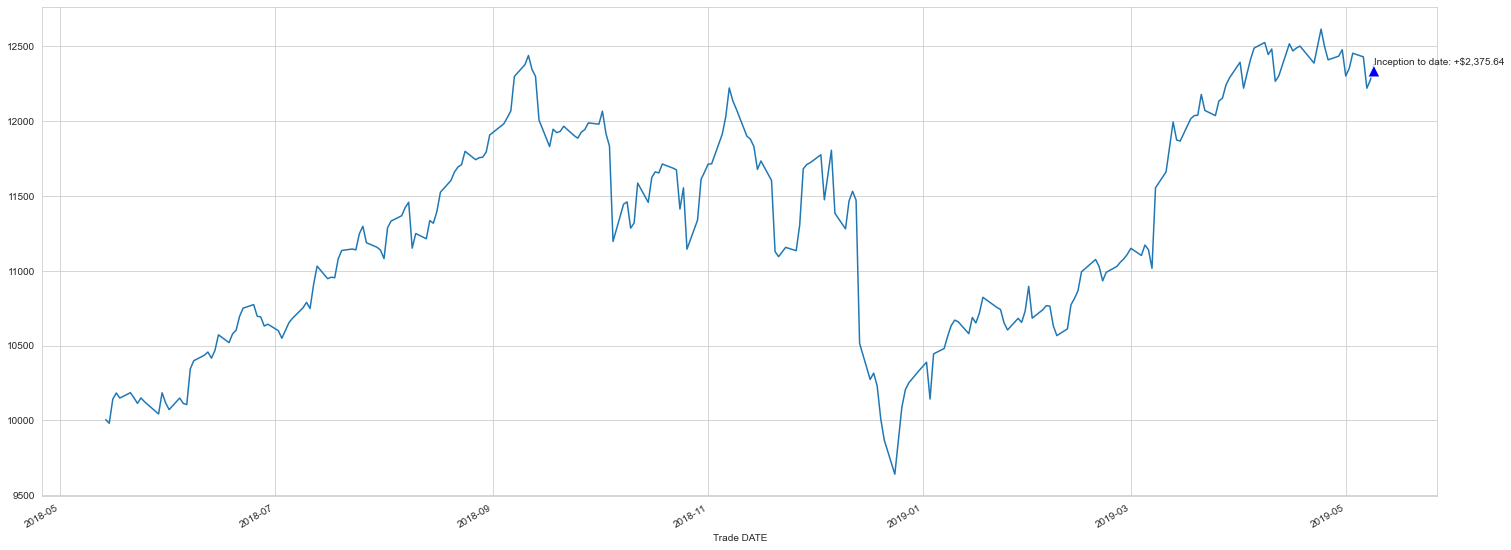

In [61]:
# Set weights
w1 = Max_SharpeRatio_row['Portfolio Weights'][0]
w2 = Max_SharpeRatio_row['Portfolio Weights'][1]
w3 = Max_SharpeRatio_row['Portfolio Weights'][2]
highest_SharpeRatio = Max_SharpeRatio_row['Sharpe Ratio']

print(f'The optimal portfolio has a sharpe ratio = {highest_SharpeRatio:.3} and stock weightings: GOOG: {w1*100:.3}% | AAPL: {w2*100:.3}% | COST: {w3*100:.3}%')

weights = [w1, w2, w3]

# Calculate portfolio return
unoptimized_portfolio_df = stock_returns_df.dot(weights)
portfolio_returns = (1 + unoptimized_portfolio_df).cumprod()


# Set Portfolio Weights, Calculate Daily and Cumulative Portfolio Returns
initial_investment = 10000
portfolio_profits = (initial_investment * portfolio_returns)
inception_to_date = ("Inception to date: +${:,.2f}".format(portfolio_profits[-1]-initial_investment))

#  Plot $10,000 Investment Over Time for Optimized Portfolio
plt.figure(figsize=(25, 10))
portfolio_profits.plot().annotate(inception_to_date,xy=(portfolio_profits.index[-1], portfolio_profits[-1]), arrowprops = dict(facecolor ='blue', shrink = 0.7),)

In [62]:
print(f'The equally weighted portfolio of GOOG, APPL, and COST, had a return of {unopt_inception_to_date}.')
print(f"The optimized portfolio with the weights of GOOG: {w1*100:.3}% | AAPL: {w2*100:.3}% | COST: {w3*100:.3}%', had a return of {inception_to_date}.")

The equally weighted portfolio of GOOG, APPL, and COST, had a return of Inception to date: +$1,318.55.
The optimized portfolio with the weights of GOOG: 1.11% | AAPL: 3.03% | COST: 95.9%', had a return of Inception to date: +$2,375.64.


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [63]:
# Join your returns DataFrame to the original returns DataFrame (NB: Joining equally weighted portfolio of GOOG, AAPL, COST)
unoptimized_portfolio_df.head()
all_returns_df = pd.concat([all_returns_df, unoptimized_portfolio_df], axis="columns", join="inner")



# Rename new portfolio to all_returns_df containing portfolios analyzed in the first section of this assignment
last_column = all_returns_df.columns.values[-1]
all_returns_df.rename({last_column:'MY_PORTFOLIO'}, axis=1, inplace = True)

# Drop duplicate columns of MY_PORTFOLIO
all_returns_df = all_returns_df.T.drop_duplicates().T

all_returns_df.head()

,SOROS,PAULSON,TIGER_GLOBAL,BERKSHIRE_HATHAWAY,ALGO1,ALGO2,SP500,MY_PORTFOLIO
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000536
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.002444
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.016149
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,0.004069
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.003309


In [64]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# Count nulls
all_returns_df.isnull().sum()

SOROS                 0
PAULSON               0
TIGER_GLOBAL          0
BERKSHIRE_HATHAWAY    0
ALGO1                 0
ALGO2                 0
SP500                 0
MY_PORTFOLIO          0
dtype: int64

In [65]:
# Drop nulls
all_returns_df = all_returns_df.dropna()
all_returns_df.isnull().sum()

SOROS                 0
PAULSON               0
TIGER_GLOBAL          0
BERKSHIRE_HATHAWAY    0
ALGO1                 0
ALGO2                 0
SP500                 0
MY_PORTFOLIO          0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [68]:
# Calculate the annualized `std` for MY_PORTFOLIO
myportfolio_annual_stdev = all_returns_df['MY_PORTFOLIO'].std() * np.sqrt(252)
print(f"The annualized standard deviation of my portfolio of stocks (GOOG, APPL, COST) is: {myportfolio_annual_stdev:.4}")

# Create dictionary of portfolios standard deviations
#all_portfolio_stdev = {'SOROS' : soros_stdev, 
#                       'PAULSON' : paulson_stdev, 
#                       'TIGER': tiger_stdev, 
#                       'ALGO1': algo1_stdev, 
#                       'ALGO2': algo2_stdev}


# Add stdev of MY_PORTFOLIO to dictionary containing stdev of all portfolios
#all_portfolio_stdev

The annualized standard deviation of my portfolio of stocks (GOOG, APPL, COST) is: 0.2086


### Calculate and plot rolling `std` with 21-day window

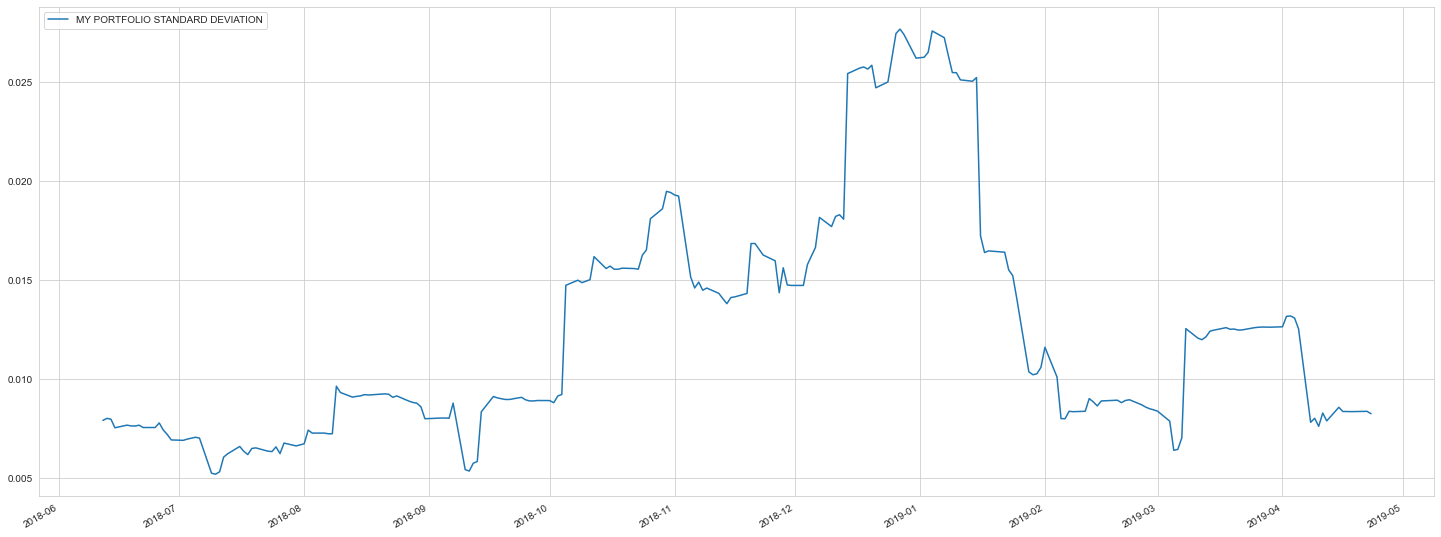

In [70]:
# Calculate rolling standard deviation
myportfolio_rolling_stdev = all_returns_df['MY_PORTFOLIO'].rolling(window=21).std()

# Plot rolling standard deviation
plt.figure(figsize=(25, 10))
myportfolio_rolling_stdev.plot()

plt.legend(["MY PORTFOLIO STANDARD DEVIATION"], loc=2)


### Calculate and plot the correlation

<AxesSubplot:>

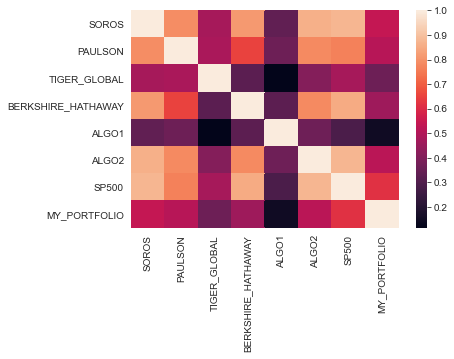

In [71]:
# Calculate and plot the correlation -- all portfolios
correlation_all = all_returns_df.corr()

# Display the correlation matrix
sns.heatmap(correlation_all)

In [72]:
all_returns_df.head()

,SOROS,PAULSON,TIGER_GLOBAL,BERKSHIRE_HATHAWAY,ALGO1,ALGO2,SP500,MY_PORTFOLIO
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000536
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.002444
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.016149
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,0.004069
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.003309


                 SP500  MY_PORTFOLIO
SP500         1.000000      0.618839
MY_PORTFOLIO  0.618839      1.000000


<AxesSubplot:>

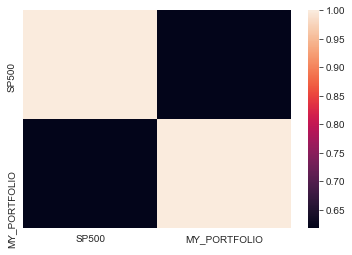

In [73]:
# Calculate correlation of MY_PORTFOLIO with S&P 500
myportfolio_sp500_df = pd.DataFrame(index=all_returns_df.index)
myportfolio_sp500_df = pd.concat([all_returns_df['SP500'], all_returns_df['MY_PORTFOLIO']], axis="columns", join="inner")
correlation = myportfolio_sp500_df.corr()
print(correlation)

# Display the correlation matrix
sns.heatmap(correlation)



### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

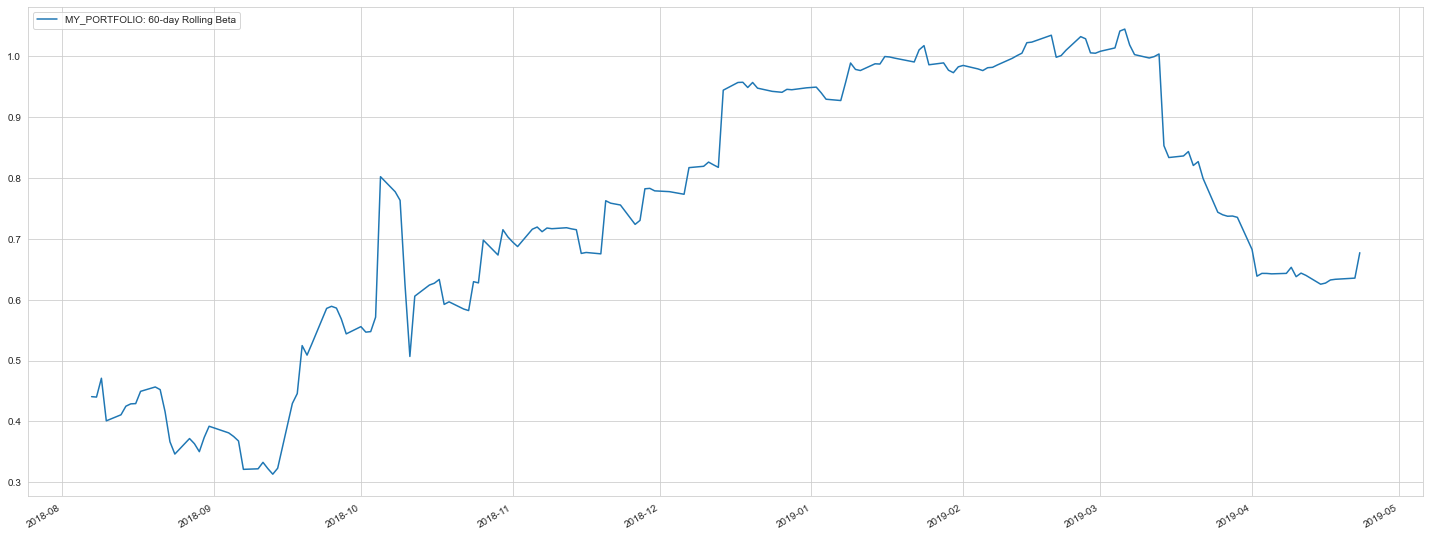

In [75]:
# Calculate and plot Beta

# Plot beta trend
# Setup: Initialize days over which to calculate rolling day averaege. 
days_rolling = 60

# Step 1: Calculate rolling covariance of MY_PORTFOLIO and S&P 500 
rolling_covariance = myportfolio_sp500_df['MY_PORTFOLIO'].rolling(window=days_rolling).cov(myportfolio_sp500_df['SP500'])

# Step 2: Calculate rolling variance of S&P 500
rolling_sp500_variance = myportfolio_sp500_df['SP500'].rolling(window=days_rolling).var()

# Step 3: Calculate rolling beta of the SOROS portfolio 
rolling_myport_beta = rolling_covariance / rolling_sp500_variance

# Step 4: Plot rolling beta of Soros portfolio
plt.figure(figsize=(25, 10))
rolling_myport_beta.plot()

# Step 5: Add legend to plot
plt.legend(['MY_PORTFOLIO: 60-day Rolling Beta'], loc=2, fontsize='medium')



### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [76]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios = (all_returns_df.mean() * 252) / (all_returns_df.std() * np.sqrt(252))
sharpe_ratios


SOROS                 0.430713
PAULSON               0.258738
TIGER_GLOBAL         -1.034216
BERKSHIRE_HATHAWAY    0.159756
ALGO1                 2.035665
ALGO2                 0.080607
SP500                 0.584820
MY_PORTFOLIO          1.243641
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

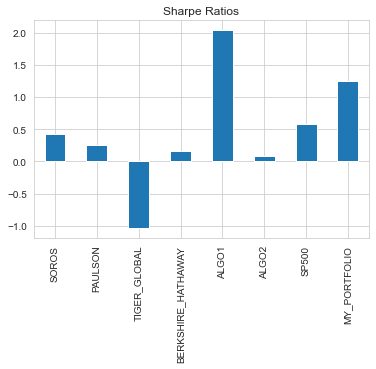

In [77]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title='Sharpe Ratios')

### How does your portfolio do?

Write your answer here!

In [79]:
print(f"My portfolio has a sharpe ratio of {sharpe_ratios['MY_PORTFOLIO']:.4}, making it the second best risk/reward portfolio, after ALGO1 with a sharpe ratio of {sharpe_ratios['ALGO1']:.4}. All other portfolios ")

My portfolio has a sharpe ratio of 1.244, making it the second best risk/reward portfolio, after ALGO1 with a sharpe ratio of 2.036. All other portfolios 
